# Final Project

## Import Dependency

In [1]:
# import lib

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, TimeDistributed, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import MeanAbsoluteError, SparseCategoricalAccuracy
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


import os
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("scikit-learn version:", sklearn.__version__)

Pandas version: 2.2.3
NumPy version: 1.26.4
TensorFlow version: 2.19.0
scikit-learn version: 1.6.0


## Load Data

In [3]:
# read csv from football-data-uk

folder_path = r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\dataset\core\\'

df = pd.read_csv(folder_path + "2040-21-06-2025_last_2000_2024_team_format.csv")

## EDA

In [4]:
pd.set_option('display.max_columns', None)
df.tail(25)

,MatchDate,Team,Opponent,FTResult,Season,IsWeekend,SeasonProgress,IsPromotedTeam,IsHome,TeamElo,OpponentElo,TeamForm3,OpponentForm3,TeamForm5,OpponentForm5,TeamYellow,OpponentYellow,TeamRed,OpponentRed,TeamFullGoal,OpponentFullGoal,TeamHalfGoal,OpponentHalfGoal,TeamShots,OpponentShots,TeamTarget,OpponentTarget,TeamFouls,OpponentFouls,TeamYellowCumu,OpponentYellowCumu,TeamRedCumu,OpponentRedCumu,TeamDaysSinceLast,OpponentDaysSinceLast,TeamAvgEloLast5,OpponentAvgEloLast5,TeamFormStreak,OpponentFormStreak,TeamDaysSinceFirst,OpponentDaysSinceFirst,FinalRank,TeamAvgGoalLast3,OpponentAvgGoalLast3,TeamAvgShotsLast3,OpponentAvgShotsLast3,TeamAvgTargetLast3,OpponentAvgTargetLast3,TeamAvgFoulsLast3,OpponentAvgFoulsLast3,xG,xGO,Season_Year
18575,2024-08-31,Wolves,Nottm Forest,D,2024/2025,1,0.077320,1,0,1677.86,1647.71,0.0,7.0,0.0,10.0,4.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,11.0,16.0,3.0,5.0,18.0,15.0,6.0,4.0,0.0,0.0,14.0,14.0,1709.636,1654.9880,0,0,7686,748,13.0,1.000000,1.333333,10.666667,14.000000,3.333333,5.333333,15.000000,13.666667,1.0,1.0,2024
18576,2024-09-15,Wolves,Newcastle,L,2024/2025,1,0.154639,1,1,1664.87,1809.33,1.0,7.0,1.0,10.0,3.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0,12.0,14.0,5.0,6.0,17.0,6.0,5.0,5.0,0.0,0.0,21.0,21.0,1710.796,1803.9000,0,0,7694,8792,13.0,1.333333,2.333333,11.666667,13.666667,4.000000,6.000000,16.000000,9.666667,1.2,1.2,2024
18577,2024-09-21,Wolves,Aston Villa,L,2024/2025,1,0.185567,1,0,1664.87,1782.06,1.0,6.0,1.0,9.0,6.0,3.0,0.0,0.0,1.0,3.0,1.0,0.0,10.0,9.0,4.0,4.0,16.0,11.0,12.0,5.0,0.0,0.0,7.0,7.0,1617.522,1616.5840,0,0,8799,8795,13.0,1.000000,2.000000,11.000000,12.666667,4.000000,4.333333,17.000000,10.333333,1.7,1.7,2024
18578,2024-09-28,Wolves,Liverpool,L,2024/2025,1,0.221649,1,1,1664.87,1903.09,1.0,6.0,1.0,12.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,8.0,10.0,3.0,6.0,16.0,8.0,7.0,5.0,0.0,0.0,13.0,27.0,1699.056,1911.4000,0,0,7707,8804,13.0,1.000000,2.333333,10.000000,20.666667,4.000000,8.666667,16.333333,8.666667,0.6,0.6,2024
18579,2024-10-05,Wolves,Brentford,L,2024/2025,1,0.257732,1,0,1654.28,1714.49,0.0,1.0,1.0,4.0,3.0,2.0,0.0,0.0,3.0,5.0,2.0,4.0,17.0,19.0,6.0,12.0,10.0,9.0,15.0,7.0,0.0,0.0,14.0,14.0,1698.296,1669.0960,0,0,3337,8813,13.0,1.666667,2.666667,11.666667,14.000000,4.333333,7.333333,14.000000,7.666667,4.2,4.2,2024
18580,2024-10-20,Wolves,Man City,L,2024/2025,1,0.335052,1,1,1656.29,2062.18,0.0,5.0,1.0,11.0,4.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,22.0,2.0,7.0,8.0,5.0,11.0,8.0,0.0,0.0,22.0,22.0,1687.316,2051.0520,0,0,7729,8828,13.0,1.666667,2.666667,9.333333,21.666667,3.666667,9.000000,11.333333,7.000000,0.8,0.8,2024
18581,2024-10-26,Wolves,Brighton,D,2024/2025,1,0.365979,1,0,1656.29,1750.22,0.0,6.0,0.0,8.0,3.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,14.0,19.0,7.0,6.0,10.0,12.0,18.0,13.0,0.0,0.0,21.0,21.0,1592.674,2054.3040,0,0,8834,8830,13.0,2.000000,2.000000,11.333333,15.333333,5.000000,6.000000,9.333333,11.000000,1.3,1.3,2024
18582,2024-11-02,Wolves,Crystal Palace,D,2024/2025,1,0.402062,1,1,1666.71,1744.99,1.0,3.0,1.0,4.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,11.0,19.0,6.0,7.0,7.0,9.0,12.0,13.0,0.0,0.0,14.0,14.0,1806.894,1954.9400,0,0,8837,8841,13.0,1.666667,2.666667,9.333333,16.000000,5.000000,7.000000,8.333333,11.000000,1.5,1.5,2024
18583,2024-11-09,Wolves,Southampton,W,2024/2025,1,0.438144,1,1,1666.71,1579.82,2.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,8.0,9.0,4.0,0.0,14.0,12.0,13.0,20.0,0.0,0.0,13.0,14.0,1740.458,1725.5960,0,0,7385,8483,13.0,2.000000,0.333333,11.000000,12.666667,5.666667,1.000000,10.333333,12.666667,1.3,1.3,2024
18584,2024-11-23,Wolves,Fulham,W,2024/2025,1,0.510309,1,0,1664.36,1753.02,5.0,7.0,5.0,7.0,0.0,3.0,0.0,0.0,4.0,1.0,1.0,1.0,10.0,10.0,5.0,3.0,14.0,14.0,18.0,18.0,0.0,1.0,28.0,19.0,1666.232,1726.0860,0,0,7770,8494,13.0,2.666667,1.666667,9.666667,15.000000,5.000000,5.000000,11.666667,12.666667,1.0,1.0,2024


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MatchDate               18600 non-null  object 
 1   Team                    18600 non-null  object 
 2   Opponent                18600 non-null  object 
 3   FTResult                18600 non-null  object 
 4   Season                  18600 non-null  object 
 5   IsWeekend               18600 non-null  int64  
 6   SeasonProgress          18600 non-null  float64
 7   IsPromotedTeam          18600 non-null  int64  
 8   IsHome                  18600 non-null  int64  
 9   TeamElo                 18600 non-null  float64
 10  OpponentElo             18600 non-null  float64
 11  TeamForm3               18600 non-null  float64
 12  OpponentForm3           18600 non-null  float64
 13  TeamForm5               18600 non-null  float64
 14  OpponentForm5           18600 non-null

In [6]:
print(df.describe())

          IsWeekend  SeasonProgress  IsPromotedTeam        IsHome  \
count  18600.000000    18600.000000    18600.000000  18600.000000   
mean       0.781505        0.508708        0.999785      0.500000   
std        0.413236        0.295956        0.014664      0.500013   
min        0.000000        0.000000        0.000000      0.000000   
25%        1.000000        0.263345        1.000000      0.000000   
50%        1.000000        0.498221        1.000000      0.500000   
75%        1.000000        0.766423        1.000000      1.000000   
max        1.000000        1.000000        1.000000      1.000000   

            TeamElo   OpponentElo     TeamForm3  OpponentForm3     TeamForm5  \
count  18600.000000  18600.000000  18600.000000   18600.000000  18600.000000   
mean    1727.859726   1727.859726      4.152581       4.152581      6.945484   
std      112.276301    112.276301      2.464730       2.464730      3.407300   
min     1475.480000   1475.480000      0.000000       0.00

In [7]:
# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Siapkan dictionary untuk menyimpan hasil analisis outlier dan skewness
outlier_analysis = {}
skewness_analysis = {}

for col in numerical_cols:
    # Hitung skewness
    skewness_analysis[col] = df[col].skew()

    # Deteksi outlier menggunakan metode IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    percent_outliers = (num_outliers / len(df)) * 100

    outlier_analysis[col] = {
        'num_outliers': num_outliers,
        'percent_outliers': percent_outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Konversi hasil ke DataFrame untuk tampilan yang lebih mudah dibaca
skewness_df = pd.DataFrame.from_dict(skewness_analysis, orient='index', columns=['Skewness'])
outlier_df = pd.DataFrame.from_dict(outlier_analysis, orient='index')

print("## Hasil Analisis Outlier (Menggunakan Metode IQR)\n")
print(outlier_df)
print("\n## Hasil Analisis Skewness\n")
print(skewness_df)

## Hasil Analisis Outlier (Menggunakan Metode IQR)

                        num_outliers  percent_outliers  lower_bound  \
IsWeekend                       4064         21.849462     1.000000   
SeasonProgress                     0          0.000000    -0.491272   
IsPromotedTeam                     4          0.021505     1.000000   
IsHome                             0          0.000000    -1.500000   
TeamElo                          130          0.698925  1415.726250   
OpponentElo                      130          0.698925  1415.726250   
TeamForm3                          0          0.000000    -4.000000   
OpponentForm3                      0          0.000000    -4.000000   
TeamForm5                          0          0.000000    -3.500000   
OpponentForm5                      0          0.000000    -3.500000   
TeamYellow                      1497          8.048387    -0.500000   
OpponentYellow                  1497          8.048387    -0.500000   
TeamRed                  

In [8]:
# Cek jumlah nilai yang hilang
print("\nCek null pada df_selected :\n", df.isnull().sum())


Cek null pada df_selected :
 MatchDate                 0
Team                      0
Opponent                  0
FTResult                  0
Season                    0
IsWeekend                 0
SeasonProgress            0
IsPromotedTeam            0
IsHome                    0
TeamElo                   0
OpponentElo               0
TeamForm3                 0
OpponentForm3             0
TeamForm5                 0
OpponentForm5             0
TeamYellow                0
OpponentYellow            0
TeamRed                   0
OpponentRed               0
TeamFullGoal              0
OpponentFullGoal          0
TeamHalfGoal              0
OpponentHalfGoal          0
TeamShots                 0
OpponentShots             0
TeamTarget                0
OpponentTarget            0
TeamFouls                 0
OpponentFouls             0
TeamYellowCumu            0
OpponentYellowCumu        0
TeamRedCumu               0
OpponentRedCumu           0
TeamDaysSinceLast         0
OpponentDaysSinceL

In [9]:
# Ambil nama klub
unique_home_teams = df['Team'].unique()
number_unique_home_teams = len(unique_home_teams)
print("Jumlah klub yang pernah ikut EPL : ", number_unique_home_teams)
print("Klub yang pernah ikut EPL : ", unique_home_teams)

Jumlah klub yang pernah ikut EPL :  46
Klub yang pernah ikut EPL :  ['Arsenal' 'Aston Villa' 'Birmingham' 'Blackburn' 'Blackpool' 'Bolton'
 'Bournemouth' 'Bradford' 'Burnley' 'Cardiff' 'Charlton' 'Chelsea'
 'Coventry' 'Crystal Palace' 'Derby' 'Everton' 'Fulham' 'Hull' 'Ipswich'
 'Leeds' 'Leicester' 'Liverpool' 'Man City' 'Man United' 'Middlesbrough'
 'Newcastle' 'Norwich' 'Portsmouth' 'QPR' 'Reading' 'Sheffield United'
 'Southampton' 'Stoke' 'Sunderland' 'Swansea' 'Tottenham' 'Watford'
 'West Brom' 'West Ham' 'Wigan' 'Wolves' 'Brentford' 'Brighton'
 'Huddersfield' 'Luton' 'Nottm Forest']


In [10]:
df.columns

Index(['MatchDate', 'Team', 'Opponent', 'FTResult', 'Season', 'IsWeekend',
       'SeasonProgress', 'IsPromotedTeam', 'IsHome', 'TeamElo', 'OpponentElo',
       'TeamForm3', 'OpponentForm3', 'TeamForm5', 'OpponentForm5',
       'TeamYellow', 'OpponentYellow', 'TeamRed', 'OpponentRed',
       'TeamFullGoal', 'OpponentFullGoal', 'TeamHalfGoal', 'OpponentHalfGoal',
       'TeamShots', 'OpponentShots', 'TeamTarget', 'OpponentTarget',
       'TeamFouls', 'OpponentFouls', 'TeamYellowCumu', 'OpponentYellowCumu',
       'TeamRedCumu', 'OpponentRedCumu', 'TeamDaysSinceLast',
       'OpponentDaysSinceLast', 'TeamAvgEloLast5', 'OpponentAvgEloLast5',
       'TeamFormStreak', 'OpponentFormStreak', 'TeamDaysSinceFirst',
       'OpponentDaysSinceFirst', 'FinalRank', 'TeamAvgGoalLast3',
       'OpponentAvgGoalLast3', 'TeamAvgShotsLast3', 'OpponentAvgShotsLast3',
       'TeamAvgTargetLast3', 'OpponentAvgTargetLast3', 'TeamAvgFoulsLast3',
       'OpponentAvgFoulsLast3', 'xG', 'xGO', 'Season_Year'],
    

In [11]:
df.shape

(18600, 53)

In [12]:
# Cek jumlah season yang dilalui tiap tim
team_season_counts = df.groupby('Team')['Season'].nunique().sort_values(ascending=False)

# Tampilkan hasil
print(team_season_counts)

Team
Arsenal             25
Tottenham           25
Man United          25
Liverpool           25
Chelsea             25
Everton             25
Man City            24
Newcastle           23
West Ham            22
Aston Villa         22
Fulham              18
Southampton         17
Sunderland          14
Crystal Palace      13
West Brom           13
Leicester           13
Wolves              11
Blackburn           11
Bolton              11
Stoke               10
Middlesbrough       10
Burnley              9
Brighton             8
Bournemouth          8
Wigan                8
Leeds                7
Birmingham           7
Swansea              7
Norwich              7
Portsmouth           7
Charlton             7
Watford              7
Hull                 5
Sheffield United     4
Brentford            4
Derby                3
Reading              3
QPR                  3
Ipswich              3
Nottm Forest         3
Cardiff              2
Huddersfield         2
Coventry             1
Bradfo

## Preprocessing

In [13]:
def normalitzation(df):
    # sort data
    df.sort_values(by=['Team', 'Season', 'MatchDate'], inplace=True)
    
    # Label encoding untuk tim
    team_encoder = LabelEncoder()
    df['TeamID'] = team_encoder.fit_transform(df['Team'])
    df['OpponentID'] = team_encoder.transform(df['Opponent'])
    
    # Fitur numerik yang akan dinormalisasi (tanpa FinalRank dan SeasonProgress) 
    #
    numerical_features = [
        'TeamElo',                # sangat tinggi importance & korelasi
        'TeamForm5',              # korelasi dan importance baik
        'TeamForm3',              # korelasi cukup baik
        'TeamAvgShotsLast3',      # korelasi kuat
        'TeamAvgTargetLast3',     # korelasi kuat
        'TeamAvgGoalLast3',       # korelasi kuat
        'TeamFullGoal',           # korelasi cukup
        'TeamHalfGoal',           # korelasi cukup
    
        'OpponentElo',            # korelasi & importance tinggi
        'OpponentAvgShotsLast3',  # korelasi & importance tinggi
        'OpponentAvgTargetLast3', # korelasi tinggi
        'OpponentAvgGoalLast3',   # korelasi cukup
        'OpponentFullGoal',       # korelasi cukup
        'OpponentHalfGoal',       # korelasi cukup
        'OpponentForm3',          # korelasi cukup
        'OpponentForm5',          # korelasi cukup
        
        'TeamDaysSinceFirst',          # importance tinggi
        'OpponentDaysSinceFirst',      # importance tinggi
        'xG', 'xGO',                   # importance & korelasi cukup
    ]
    
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df, numerical_features

In [14]:
# Pisahkan data berdasarkan Season
train = df[df['Season'] != '2024/2025'].copy()
test = df[df['Season'] == '2024/2025'].copy()

# Urutkan berdasarkan tanggal
test = test.sort_values(by=['Team', 'MatchDate'])

# Bagi test berdasarkan SeasonProgress
test = test[test['SeasonProgress'] <= 0.7].copy()

# Ambil 12 pertandingan pertama setiap tim
test = test.groupby('Team').tail(12).reset_index(drop=True)

test, numerical_features = normalitzation(test)
train, numerical_features = normalitzation(train)

In [15]:
def create_sequences(df, seq_len, numerical_features, target_col='FinalRank'):
    sequence_data = []
    team_id_seq = []
    opp_id_seq = []
    targets = []

    grouped = df.groupby(['Team', 'Season'])

    for _, group in grouped:
        group = group.sort_values('MatchDate').reset_index(drop=True)
        
        if len(group) < seq_len:
            continue
        
        if len(group) == seq_len:
            # Kasus untuk prediksi setelah tepat 12 pertandingan (tanpa sliding window)
            numeric_seq = group[numerical_features].values
            team_seq = group['TeamID'].values
            opp_seq = group['OpponentID'].values
            target = group[target_col].iloc[-1]  # misalnya target akhir musim
            
            sequence_data.append(numeric_seq)
            team_id_seq.append(team_seq)
            opp_id_seq.append(opp_seq)
            targets.append(target)

        else:
            # Sliding window normal
            for i in range(seq_len, len(group)):
                numeric_seq = group.loc[i-seq_len:i-1, numerical_features].values
                team_seq = group.loc[i-seq_len:i-1, 'TeamID'].values
                opp_seq = group.loc[i-seq_len:i-1, 'OpponentID'].values
                target = group.loc[i, target_col]

                sequence_data.append(numeric_seq)
                team_id_seq.append(team_seq)
                opp_id_seq.append(opp_seq)
                targets.append(target)

    return (
        np.array(sequence_data),
        np.array(team_id_seq),
        np.array(opp_id_seq),
        np.array(targets),
    )


In [16]:
seq_len = 12  # lebih pendek karena data test lebih sedikit

X_train_num, X_train_team, X_train_opp, y_train = create_sequences(
    train, seq_len, numerical_features
)

X_test_num, X_test_team, X_test_opp, y_test = create_sequences(
    test, seq_len, numerical_features
)


## Modeling - regresi

In [24]:
# Parameter model
num_teams = train['TeamID'].nunique()
embedding_dim = 12
timesteps = seq_len
num_features = len(numerical_features)

# Input layers
input_num = Input(shape=(timesteps, num_features), name='numeric_input')
input_team = Input(shape=(timesteps,), dtype='int32', name='team_input')
input_opp = Input(shape=(timesteps,), dtype='int32', name='opponent_input')

# Embedding untuk ID tim
team_emb = Embedding(
    input_dim=num_teams,
    output_dim=embedding_dim,
    name='team_embedding'
)(input_team)

opp_emb = Embedding(
    input_dim=num_teams,
    output_dim=embedding_dim,
    name='opp_embedding'
)(input_opp)

# Gabungkan semua input (numerik + team embedding + opponent embedding)
merged = Concatenate(axis=-1)([input_num, team_emb, opp_emb])
# Shape: (samples, timesteps, num_features + 2*embedding_dim)

# LSTM Layer
x = LSTM(
    units=128,
    return_sequences=False,
    kernel_regularizer=regularizers.l2(1e-5),
    bias_regularizer=regularizers.l2(1e-5),
    name='lstm_layer'
)(merged)

# Normalisasi batch
x = BatchNormalization(name='batch_norm')(x)

# Fully Connected Layereee323as
x = Dense(
    units=16,
    activation='relu',
    kernel_regularizer=regularizers.l2(1e-5),
    bias_regularizer=regularizers.l2(1e-5),
    name='dense_relu'
)(x)

# Dropout (regularisasi)
x = Dropout(0.2, name='dropout')(x)

# Output Layer (regresi)
output = Dense(
    units=1,
    activation='linear',
    name='final_rank_output',
    kernel_regularizer=regularizers.l2(1e-5),
    bias_regularizer=regularizers.l2(1e-5)
)(x)

#optimizer
rmsprop = RMSprop(learning_rate=0.001)

# Bangun model
model = Model(inputs=[input_num, input_team, input_opp], outputs=output)
model.compile(optimizer=rmsprop, loss='mse', metrics=[MeanAbsoluteError()])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ team_input          │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ opponent_input      │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 12, 20)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ team_embedding      │ (None, 12, 12)    │        552 │ team_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ opp_embedding       │ (None, 12, 12)    │        552 │ opponent_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12, 44)    │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ team_embedding[0… │
│                     │                   │            │ opp_embedding[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer (LSTM)   │ (None, 128)       │     88,576 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm          │ (None, 128)       │        512 │ lstm_layer[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_relu (Dense)  │ (None, 16)        │      2,064 │ batch_norm[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16)        │          0 │ dense_relu[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_rank_output   │ (None, 1)         │         17 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 92,273 (360.44 KB)

 Trainable params: 92,017 (359.44 KB)

 Non-trainable params: 256 (1.00 KB)

In [25]:
# Buat callback early stopping
# early_stop = 
# EarlyStopping(
#   patience=10,              # Berhenti kalau tidak membaik selama 5 epoch
#    restore_best_weights=True  # Ambil bobot terbaik sebelum overfitting
# )

# Training dengan early stopping
#callbacks=[early_stop]
history = model.fit(
    x=[X_train_num, X_train_team, X_train_opp],
    y=y_train,
    batch_size=16,
    epochs=50,
    validation_split=0.2,
    shuffle=True,
)


Epoch 1/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 29.2843 - mean_absolute_error: 4.1281 - val_loss: 6.9713 - val_mean_absolute_error: 2.1179
Epoch 2/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 13.3563 - mean_absolute_error: 2.7525 - val_loss: 7.9806 - val_mean_absolute_error: 2.2475
Epoch 3/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 10.1681 - mean_absolute_error: 2.4033 - val_loss: 8.9737 - val_mean_absolute_error: 2.4250
Epoch 4/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.9282 - mean_absolute_error: 2.2720 - val_loss: 9.3282 - val_mean_absolute_error: 2.3945
Epoch 5/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.5560 - mean_absolute_error: 2.0580 - val_loss: 8.9490 - val_mean_absolute_error: 2.3603
Epoch 6/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.1742 - mean_absolute_error: 2.0000 - val_loss: 10.0661 - val_mean_absolute_error: 2.5198
Epoch 7/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.6009 - mean_absolute_error: 1.9296

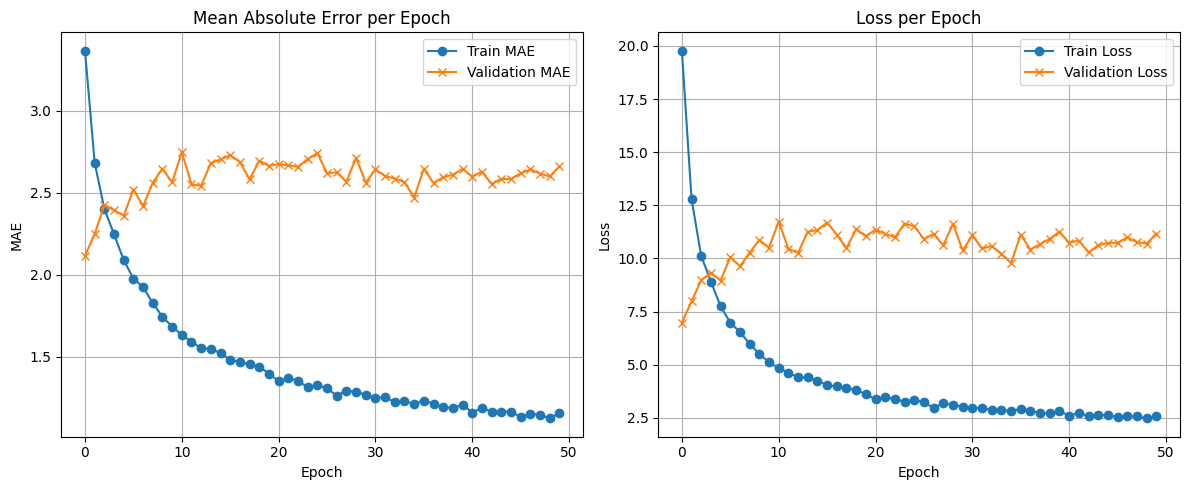

In [26]:
plt.figure(figsize=(12, 5))

# MAE|
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Train MAE', marker='o')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', marker='x')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluasi

In [27]:
# Prediksi
y_pred = model.predict([X_test_num, X_test_team, X_test_opp])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [28]:
# Bulatkan
y_pred = np.rint(y_pred).astype(int)  # dibulatkan ke bilangan bulat terdekat

In [29]:
y_pred

array([[ 3],
       [ 7],
       [15],
       [12],
       [14],
       [ 6],
       [15],
       [17],
       [ 8],
       [17],
       [19],
       [ 2],
       [ 2],
       [13],
       [10],
       [12],
       [19],
       [ 8],
       [ 8],
       [17]])

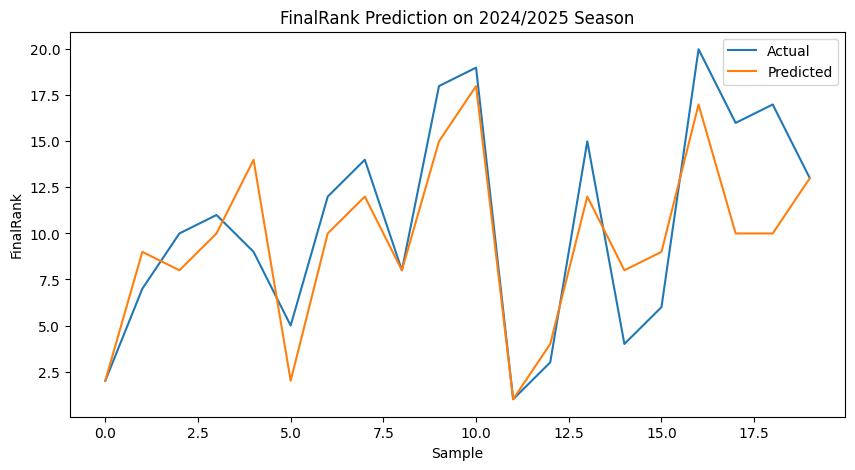

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.title('FinalRank Prediction on 2024/2025 Season')
plt.xlabel('Sample')
plt.ylabel('FinalRank')
plt.show()

In [130]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2.4


## Tuning

In [131]:
import keras_tuner as kt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Embedding, Concatenate, BatchNormalization
from tensorflow.keras.metrics import MeanAbsoluteError
import tensorflow as tf

def build_model(hp):
    num_teams = train['TeamID'].nunique()
    timesteps = seq_len
    num_features = len(numerical_features)

    embedding_dim = hp.Choice('embedding_dim', [8, 12, 16, 20])
    lstm_units = hp.Choice('lstm_units', [64, 128, 256])
    dense_units = hp.Choice('dense_units', [8, 16, 32, 64])
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.5, step=0.1)
    l2_reg = hp.Choice('l2_reg', [1e-4, 1e-5, 1e-6])
    learning_rate = hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])

    input_num = Input(shape=(timesteps, num_features), name='numeric_input')
    input_team = Input(shape=(timesteps,), dtype='int32', name='team_input')
    input_opp = Input(shape=(timesteps,), dtype='int32', name='opponent_input')

    team_emb = Embedding(num_teams, embedding_dim, name='team_embedding')(input_team)
    opp_emb = Embedding(num_teams, embedding_dim, name='opp_embedding')(input_opp)

    merged = Concatenate(axis=-1)([input_num, team_emb, opp_emb])

    x = LSTM(
        units=lstm_units,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(l2_reg),
        bias_regularizer=regularizers.l2(l2_reg),
        name='lstm_layer'
    )(merged)

    if hp.Boolean('use_batchnorm'):
        x = BatchNormalization()(x)

    x = Dense(
        units=dense_units,
        activation='relu',
        kernel_regularizer=regularizers.l2(l2_reg),
        bias_regularizer=regularizers.l2(l2_reg),
        name='dense_relu'
    )(x)

    x = Dropout(dropout_rate)(x)

    output = Dense(1, activation='linear', name='final_rank_output')(x)

    model = Model(inputs=[input_num, input_team, input_opp], outputs=output)

    optimizer = {
        'adam': tf.keras.optimizers.Adam(learning_rate),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate)
    }[optimizer_choice]

    model.compile(optimizer=optimizer, loss='mse', metrics=[MeanAbsoluteError()])
    return model

# Buat tuner
tuner = kt.Hyperband(
    build_model,  # pastikan fungsi ini sudah kamu buat sebelumnya
    objective='val_mean_absolute_error',
    max_epochs=50,         # epoch maksimum yang bisa dijalani oleh model terbaik
    factor=3,              # rasio pengurangan model setiap iterasi
    directory='lstm_tuning',
    project_name='final_rank_rnn_hyperband04',
    overwrite=True         # kalau mau ulang tuning dari awal
)


In [132]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Simpan model terbaik secara otomatis berdasarkan val_loss atau val_mae
checkpoint_cb = ModelCheckpoint(
    filepath='best_lstm_model.keras',  # format .h5 atau .keras
    monitor='val_mean_absolute_error',  # atau val_loss
    save_best_only=True,
    save_weights_only=False,  # True jika kamu hanya ingin simpan bobot
    mode='min',  # karena kita ingin error serendah mungkin
    verbose=1
)

# Early stopping untuk menghentikan training jika tidak improve
earlystop_cb = EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=10,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

tuner.search(
    [X_train_num, X_train_team, X_train_opp],
    y_train,
    validation_split=0.2,
    epochs=50,
    callbacks=[earlystop_cb, checkpoint_cb],
    verbose=2
)

Trial 90 Complete [00h 01m 02s]
val_mean_absolute_error: 2.279165744781494

Best val_mean_absolute_error So Far: 2.1220290660858154
Total elapsed time: 01h 06m 30s


In [133]:
# Hapus JSON
#import shutil
#shutil.rmtree("lstm_tuning/final_rank_rnn")  # hati-hati, ini menghapus folder


## Load Best Model 

In [18]:
# Ganti path ini dengan folder tuning milikmu
base_dir = r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\lstm_tuning\final_rank_rnn_hyperband03'

best_trial = None
best_score = float('inf')

# Telusuri semua subfolder dalam base_dir
for subdir in os.listdir(base_dir):
    trial_path = os.path.join(base_dir, subdir, 'trial.json')
    if os.path.isfile(trial_path):
        with open(trial_path, 'r') as f:
            trial_data = json.load(f)
            score = trial_data.get('score', None)
            if score is not None and score < best_score:
                best_score = score
                best_trial = trial_data

# Tampilkan hasil terbaik
if best_trial:
    print(f"Best val_mean_absolute_error: {best_score:.4f}")
    print("Best hyperparameters:")
    for param, val in best_trial['hyperparameters']['values'].items():
        print(f"  {param}: {val}")
else:
    print("Tidak ada trial.json yang ditemukan di dalam folder.")

Best val_mean_absolute_error: 2.0371
Best hyperparameters:
  embedding_dim: 8
  lstm_units: 256
  dense_units: 32
  dropout_rate: 0.1
  l2_reg: 0.0001
  learning_rate: 0.0001
  optimizer: adam
  use_batchnorm: False
  tuner/epochs: 6
  tuner/initial_epoch: 2
  tuner/bracket: 3
  tuner/round: 1
  tuner/trial_id: 0003


In [19]:
from tensorflow.keras.models import load_model

best_model = load_model(r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\models\best_lstm_model_1149_24_06.keras')

In [20]:
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ team_input          │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ opponent_input      │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 12, 20)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ team_embedding      │ (None, 12, 12)    │        552 │ team_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ opp_embedding       │ (None, 12, 12)    │        552 │ opponent_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 12, 44)    │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ team_embedding[0… │
│                     │                   │            │ opp_embedding[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_layer (LSTM)   │ (None, 128)       │     88,576 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_relu (Dense)  │ (None, 16)        │      2,064 │ lstm_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16)        │          0 │ dense_relu[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_rank_output   │ (None, 1)         │         17 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 183,524 (716.89 KB)

 Trainable params: 91,761 (358.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,763 (358.45 KB)

In [21]:
best_model.optimizer.get_config()

{'name': 'rmsprop',
 'learning_rate': 0.0005000000237487257,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

### Eval Hasil Murni

In [22]:
test_loss, test_mae = best_model.evaluate([X_test_num, X_test_team, X_test_opp], y_test)
print(f'Test MAE: {test_mae:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - loss: 6.4987 - mean_absolute_error: 1.8675
Test MAE: 1.868


In [23]:
# Buat prediksi dari best_model
y_pred = best_model.predict([X_test_num, X_test_team, X_test_opp])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr, kendalltau

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
spearman, _ = spearmanr(y_test, y_pred)
kendall, _ = kendalltau(y_test, y_pred)
1
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Spearman Correlation: {spearman:.2f}")
print(f"Kendall Tau: {kendall:.2f}")


MAE: 1.87
MSE: 6.50
Spearman Correlation: 0.89
Kendall Tau: 0.76


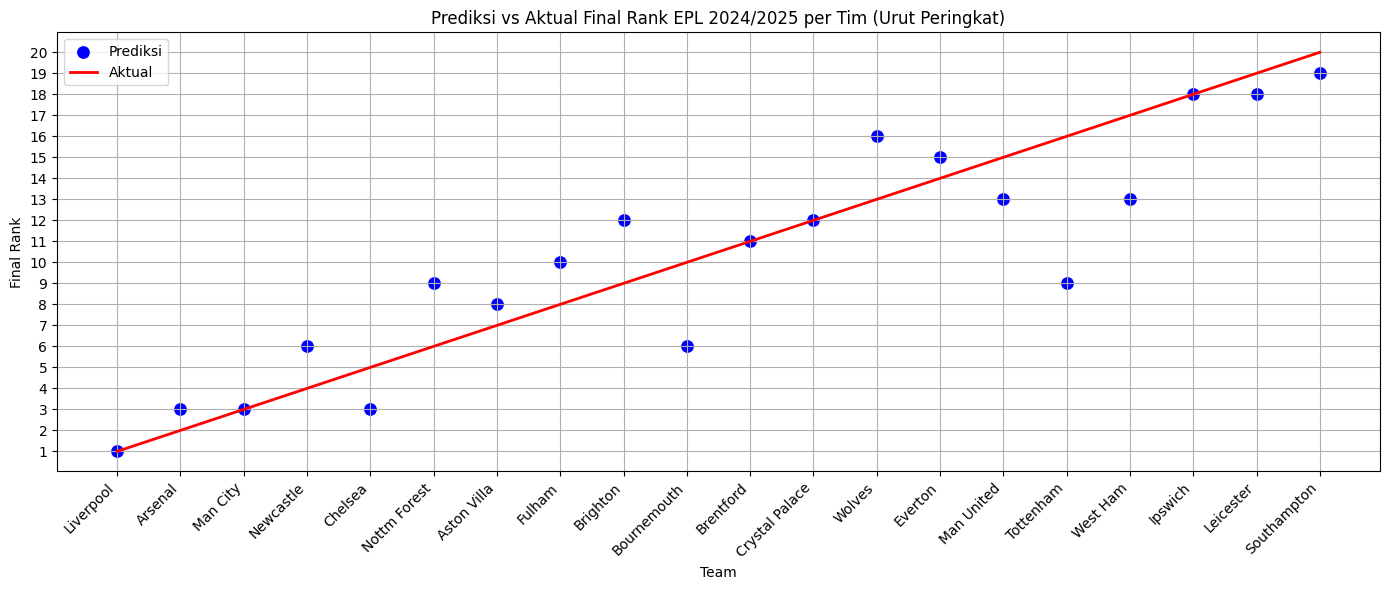

In [25]:
# Gabungkan data
df_result = pd.DataFrame({
    'Team': test['Team'].unique(),
    'y_test': y_test.round(),
    'y_pred': y_pred.flatten().round()
})

# Urutkan berdasarkan y_test dari peringkat terbaik (1) ke terburuk (20)
df_result = df_result.sort_values('y_test', ascending=True)

# Jadikan urutan Team sebagai kategori terurut
df_result['Team'] = pd.Categorical(df_result['Team'], categories=df_result['Team'], ordered=True)

# Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_result, x='Team', y='y_pred', label='Prediksi', color='blue', s=100)
sns.lineplot(data=df_result, x='Team', y='y_test', label='Aktual', color='red', linewidth=2)

# Set label y jadi bilangan bulat 1–20
plt.yticks(range(1, 21))

plt.xticks(rotation=45, ha='right')
plt.ylabel('Final Rank')
plt.title('Prediksi vs Aktual Final Rank EPL 2024/2025 per Tim (Urut Peringkat)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
test['Team'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Ipswich',
       'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle',
       'Nottm Forest', 'Southampton', 'Tottenham', 'West Ham', 'Wolves'],
      dtype=object)

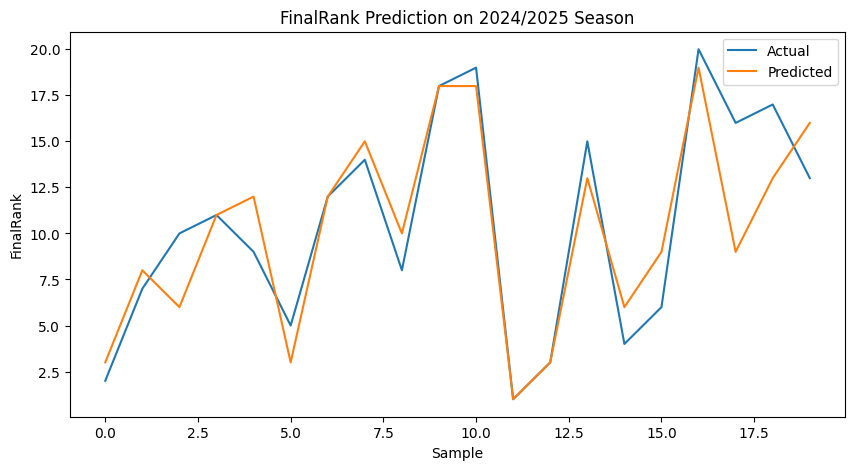

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred.round(), label='Predicted')
plt.legend()
plt.title('FinalRank Prediction on 2024/2025 Season')
plt.xlabel('Sample')
plt.ylabel('FinalRank')
plt.show()

### Eval Hasil Modifikasi

In [40]:
y_modif = pd.Series(y_pred.flatten()).rank(method='min', ascending=True).astype(int)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr, kendalltau

mae = mean_absolute_error(y_test, y_modif)
mse = mean_squared_error(y_test, y_modif)
spearman, _ = spearmanr(y_test, y_modif)
kendall, _ = kendalltau(y_test, y_modif)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Spearman Correlation: {spearman:.2f}")
print(f"Kendall Tau: {kendall:.2f}")


MAE: 1.80
MSE: 7.10
Spearman Correlation: 0.89
Kendall Tau: 0.76


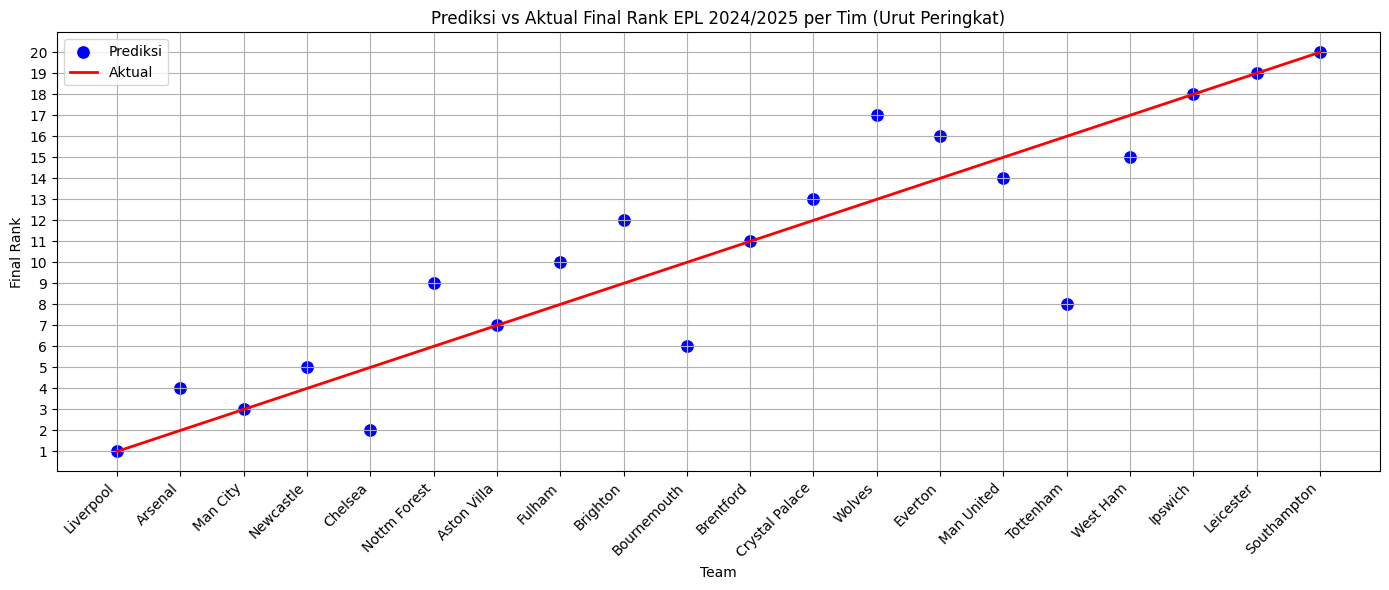

In [44]:
# Gabungkan data
df_result = pd.DataFrame({
    'Team': test['Team'].unique(),
    'y_test': y_test,
    'y_pred': y_modif
})

# Urutkan berdasarkan y_test dari peringkat terbaik (1) ke terburuk (20)
df_result = df_result.sort_values('y_test', ascending=True)

# Jadikan urutan Team sebagai kategori terurut
df_result['Team'] = pd.Categorical(df_result['Team'], categories=df_result['Team'], ordered=True)

# Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_result, x='Team', y='y_pred', label='Prediksi', color='blue', s=100)
sns.lineplot(data=df_result, x='Team', y='y_test', label='Aktual', color='red', linewidth=2)

# Set label y jadi bilangan bulat 1–20
plt.yticks(range(1, 21))

plt.xticks(rotation=45, ha='right')
plt.ylabel('Final Rank')
plt.title('Prediksi vs Aktual Final Rank EPL 2024/2025 per Tim (Urut Peringkat)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

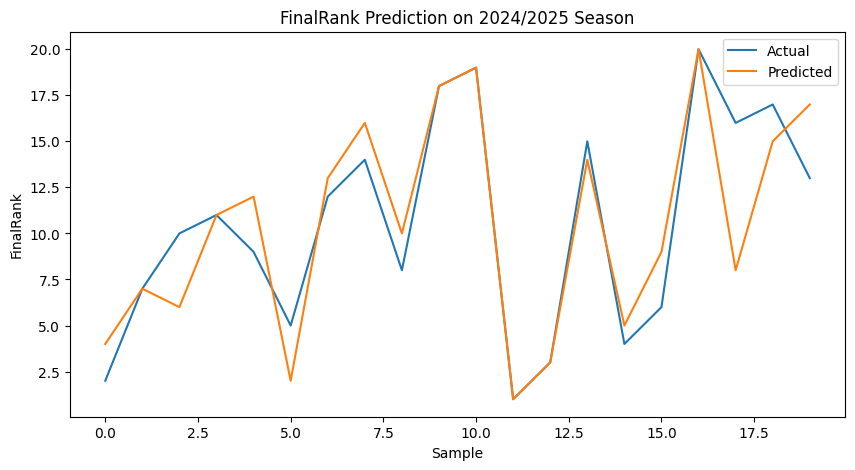

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_modif, label='Predicted')
plt.legend()
plt.title('FinalRank Prediction on 2024/2025 Season')
plt.xlabel('Sample')
plt.ylabel('FinalRank')
plt.show()